# KDE

https://jakevdp.github.io/PythonDataScienceHandbook/05.13-kernel-density-estimation.html

http://shogun-toolbox.org/notebook/latest/KernelDensity.html

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import warnings
import scipy.stats as stats
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KernelDensity
from dataset import Dataset


warnings.simplefilter(action='ignore')

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# pdf function for plotting
n_samples = 100
x_min = 0.001
x_max = 15

# parameters of the distribution
mu1 = 4
sigma1 = 1
mu2 = 8
sigma2 = 2

# Parameters of the KDE
bandwidth = 0.5

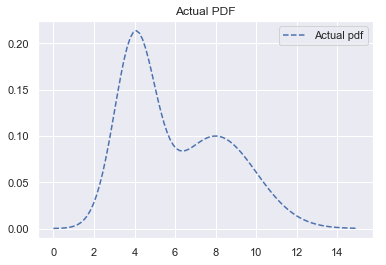

In [3]:
x = np.linspace(x_min, x_max, n_samples)
y = 0.5*(stats.norm(mu1, sigma1).pdf(x)+stats.norm(mu2, sigma2).pdf(x))

# plot actual pdf
plt.plot(x, y, 'b--', label="Actual pdf")
plt.legend(numpoints=1)
plt.title('Actual PDF')
plt.show();

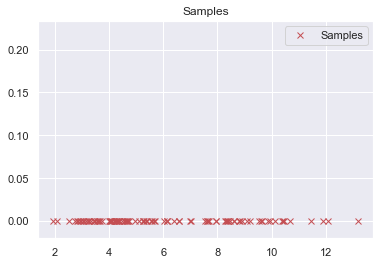

In [4]:
def generate_samples(n_samples, mu1, sigma1, mu2, sigma2):
    samples1 = np.random.normal(mu1, sigma1, (1, int(n_samples/2)))
    samples2 = np.random.normal(mu2, sigma2, (1, int(n_samples/2)))
    samples = np.concatenate((samples1, samples2), 1)
    return samples

samples = generate_samples(n_samples, mu1, sigma1, mu2, sigma2)
samples = samples.T

# plot samples
plt.plot(samples, np.zeros(n_samples), 'rx', label="Samples")
plt.legend(numpoints=1)
plt.title('Samples')
plt.ylim(-0.02, max(y)+0.02)
plt.show()

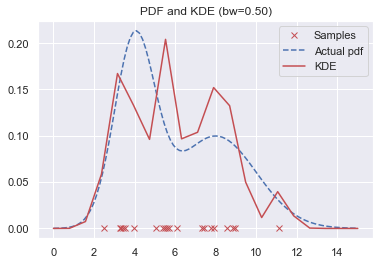

In [5]:
# Generate more samples
n_samples = 20
samples = generate_samples(n_samples, mu1, sigma1, mu2, sigma2)
samples = samples.T

# instantiate and fit the KDE model
kde = KernelDensity(bandwidth=bandwidth, kernel='gaussian')
kde.fit(samples)

# score_samples returns the log of the probability density
x_d = np.linspace(x_min, x_max, n_samples).reshape(-1, 1)
logprob = kde.score_samples(x_d)

plt.plot(samples, np.zeros(n_samples), 'rx', label='Samples')
plt.plot(x, y, 'b--', label="Actual pdf")
plt.plot(x_d, np.exp(logprob), 'r-', label='KDE')
plt.legend()
plt.title('PDF and KDE (bw={:.2f})'.format(bandwidth))
plt.show();

In [6]:
bandwidths = 10 ** np.linspace(-1, 1, 100)
grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': bandwidths},
                    cv=LeaveOneOut())
grid.fit(x[:, None]);
bandwidth = grid.best_params_['bandwidth']
print('Optimal Bandwidth: {:.2f}'.format(bandwidth))

Optimal Bandwidth: 1.02


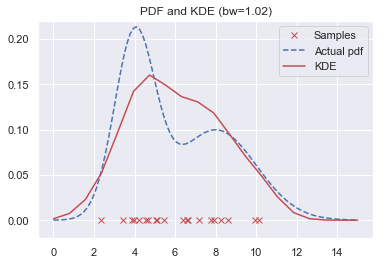

In [7]:
# Generate samples
n_samples = 20
samples = generate_samples(n_samples, mu1, sigma1, mu2, sigma2)
samples = samples.T

# instantiate and fit the KDE model
kde = KernelDensity(bandwidth=bandwidth, kernel='gaussian')
kde.fit(samples)

# score_samples returns the log of the probability density
x_d = np.linspace(x_min, x_max, n_samples).reshape(-1, 1)
logprob = kde.score_samples(x_d)

# plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(samples, np.zeros(n_samples), 'rx', label='Samples')
plt.plot(x, y, 'b--', label="Actual pdf")
plt.plot(x_d, np.exp(logprob), 'r-', label='KDE')
plt.legend()
plt.title('PDF and KDE (bw={:.2f})'.format(bandwidth))
plt.ylim(-0.02, 0.22)
plt.show();

Effect on the number of samples used to fit the KDE. Let's jump from 20 to 200, with same bandwidth.

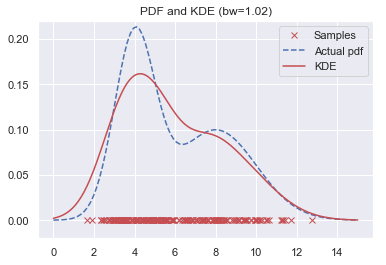

In [8]:
# Generate more samples
n_samples = 200
samples = generate_samples(n_samples, mu1, sigma1, mu2, sigma2)
samples = samples.T

# instantiate and fit the KDE model
kde = KernelDensity(bandwidth=bandwidth, kernel='gaussian')
kde.fit(samples)

# score_samples returns the log of the probability density
x_d = np.linspace(x_min, x_max, n_samples).reshape(-1, 1)
logprob = kde.score_samples(x_d)

# plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(samples, np.zeros(n_samples), 'rx', label='Samples')
plt.plot(x, y, 'b--', label="Actual pdf")
plt.plot(x_d, np.exp(logprob), 'r-', label='KDE')
plt.legend()
plt.title('PDF and KDE (bw={:.2f})'.format(bandwidth))
plt.ylim(-0.02, 0.22)
plt.show();

## HR Dataset

In [9]:
hr = Dataset('./data/hr-analytics.zip')
hr.set_target('left')
hr.to_categorical(['number_project', 'time_spend_company',
                   'promotion_last_5years', 'Work_accident'])
#hr.onehot_encode(hr.names('categorical'))
hr.scale()
hr.summary()


Features Summary:
'satisfaction_level'   : float64    Min.(-2.1) 1stQ(-0.6) Med.(0.10) Mean(-1.7) 3rdQ(0.83) Max.(1.55)
'last_evaluation'      : float64    Min.(-2.0) 1stQ(-0.9) Med.(0.02) Mean(-4.2) 3rdQ(0.89) Max.(1.65)
'number_project'       : object     6 categs. '2.0'(4365, 0.2910) '5.0'(4055, 0.2704) '7.0'(2761, 0.1841) '6.0'(2388, 0.1592) ...
'average_montly_hours' : float64    Min.(-2.1) 1stQ(-0.9) Med.(-0.0) Mean(-4.9) 3rdQ(0.88) Max.(2.18)
'time_spend_company'   : object     8 categs. '3.0'(6443, 0.4296) '6.0'(3244, 0.2163) '4.0'(2557, 0.1705) '5.0'(1473, 0.0982) ...
'Work_accident'        : object     2 categs. '0.0'(12830, 0.8554) '1.0'(2169, 0.1446) 
'promotion_last_5years': object     2 categs. '0.0'(14680, 0.9787) '1.0'(319, 0.0213) 
'sales'                : object     10 categs. 'sales'(4140, 0.2760) 'accounting'(2720, 0.1813) 'hr'(2229, 0.1486) 'technical'(1227, 0.0818) ...
'salary'               : object     3 categs. 'low'(7316, 0.4878) 'medium'(6446, 0.4298) 'high'

In [10]:
from sklearn.base import BaseEstimator, ClassifierMixin


class KDEClassifier(BaseEstimator, ClassifierMixin):
    """Bayesian generative classification based on KDE
    
    Parameters
    ----------
    bandwidth : float
        the kernel bandwidth within each class
    kernel : str
        the kernel name, passed to KernelDensity
    """
    def __init__(self, bandwidth=1.0, kernel='gaussian'):
        self.bandwidth = bandwidth
        self.kernel = kernel
        
    def fit(self, X, y):
        self.classes_ = np.sort(np.unique(y))
        training_sets = [X[y == yi] for yi in self.classes_]
        self.models_ = [KernelDensity(bandwidth=self.bandwidth,
                                      kernel=self.kernel).fit(Xi)
                        for Xi in training_sets]
        self.logpriors_ = [np.log(Xi.shape[0] / X.shape[0])
                           for Xi in training_sets]
        return self
        
    def predict_proba(self, X):
        logprobs = np.array([model.score_samples(X)
                             for model in self.models_]).T
        result = np.exp(logprobs + self.logpriors_)
        return result / result.sum(1, keepdims=True)
        
    def predict(self, X):
        return self.classes_[np.argmax(self.predict_proba(X), 1)]

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV

bandwidths = 10 ** np.linspace(-1, 0, 10)
grid = GridSearchCV(KDEClassifier(), {'bandwidth': bandwidths},
                   scoring='accuracy')
grid.fit(hr.select('numerical'), hr.target)
scores = grid.cv_results_['mean_test_score']

plt.plot(scores)
plt.show();